### Project : The Canada Fuel Consumption Prediction, using Multiple Linear Regression

#### Loading Data

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

- MODELYEAR e.g. 2014
- MAKE e.g. Acura
- MODEL e.g. ILX
- VEHICLE CLASS e.g. SUV
- ENGINE SIZE e.g. 4.7
- CYLINDERS e.g 6
- TRANSMISSION e.g. A6
- FUELTYPE e.g. z
- FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
- FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
- FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
- CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

In [1]:
# Importing our Libraries 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


%matplotlib inline

In [2]:
# Loading Data
path = r"D:\Bassam Projects\Fuel Consumption in Canada\Fuel_Consumption.xlsx"
df = pd.read_excel(path)

df.head(10)

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,1,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,3,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,4,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,5,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,6,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,7,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,9,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,10,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


### Cleaning Data

In [3]:
# Verifiying the DataFrame datatypes
df.dtypes

# Checking if they are any missing values
df.isna().any()

# Renaming columns
df.rename(columns = {'MODELYEAR': 'MODEL_YEAR', 'VEHICLECLASS': 'VEHICLE_CLASS', 'FUELTYPE': 'FUEL_TYPE',
                                  'CO2EMISSIONS': 'CO2_EMISSIONS', 'ENGINESIZE': 'ENGINE_SIZE'}, inplace = True)

df

,Unnamed: 0,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2_EMISSIONS
0,1,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,3,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,4,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,5,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,1064,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,1066,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


The result is that there's no missing value

In [4]:
df

,Unnamed: 0,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2_EMISSIONS
0,1,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,3,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,4,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,5,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,1064,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,1066,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [5]:
df.dtypes
# df = df.astype(str)
# print(df.dtypes)

Unnamed: 0                    int64
MODEL_YEAR                    int64
MAKE                         object
MODEL                        object
VEHICLE_CLASS                object
ENGINE_SIZE                 float64
CYLINDERS                     int64
TRANSMISSION                 object
FUEL_TYPE                    object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2_EMISSIONS                 int64
dtype: object

#### Checking for Multicollinearity
**What is multicollinearity?**

One of the assumptions of our model is that there isn't any Perfect multicollinearity. Multicollinearity is where one of the explanatory variables is highly correlated with another explanatory variable. In essence, one of the X variables is almost perfectly correlated with another or multiple X variables.

---

**What is the problem with multicollinearity?**

The problem with multicollinearity, from a math perspective, is that the coefficient estimates themselves tend to be unreliable. Additionally, the standard errors of slope coefficients become artificially inflated. Because the standard error is used to help calculate the p-value, this leads to a higher probability that we will incorrectly conclude that a variable is not statistically significant.

Another way we can look at this problem is by using an analogy. Imagine we ask you to go to a concert and determine who was the best singer. This task would become very challenging if you couldn't distinguish the two singers because they are singing at the same volume. The idea is the same in our analysis, how can we determine which variable is playing a role in our model if we can't distinguish the two? The problem is we can't.

Now a little correlation is fine, but if it gets too high, we can effectively distinguish the two variables. The other issue that arises is that when we have highly correlated exploratory variables is that, in a sense, we have duplicates. This means that we can remove one of them and we haven't lost anything; the model would still perform the same.

---

**How to test for multicollinearity?**

Because of these drawbacks, we should always check for multicollinearity in our data. Now, in the step above I purposely pull in variables that I knew would be highly correlated with each other; that way we could see some examples of variables that would cause some issues.

The first thing we can do is create a correlation matrix using the `corr()` function; this will create a matrix with each variable having its correlation calculated for all the other variables. Keep in mind, if you travel diagonally down the matrix all the associations should be one, as it is calculating the correlation of the variable with itself. When we have multiple variables as we do, I sometimes prefer to use a correlation heatmap this way I can quickly identify the highly correlated variables, by just looking for the darker colors.

In [6]:
# df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,Unnamed: 0,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2_EMISSIONS
0,1,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,3,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,4,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,5,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,1064,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,1066,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [7]:
# Printing out the correlation matrix of our data frame
corr_matrix = df.corr()
display(corr_matrix)

,Unnamed: 0,MODEL_YEAR,ENGINE_SIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2_EMISSIONS
Unnamed: 0,1.000000,NaN,-0.154145,-0.197897,-0.230103,-0.154857,-0.204676,0.210125,-0.179131
MODEL_YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINE_SIZE,-0.154145,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,-0.197897,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,-0.230103,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,-0.154857,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,-0.204676,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,0.210125,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2_EMISSIONS,-0.179131,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


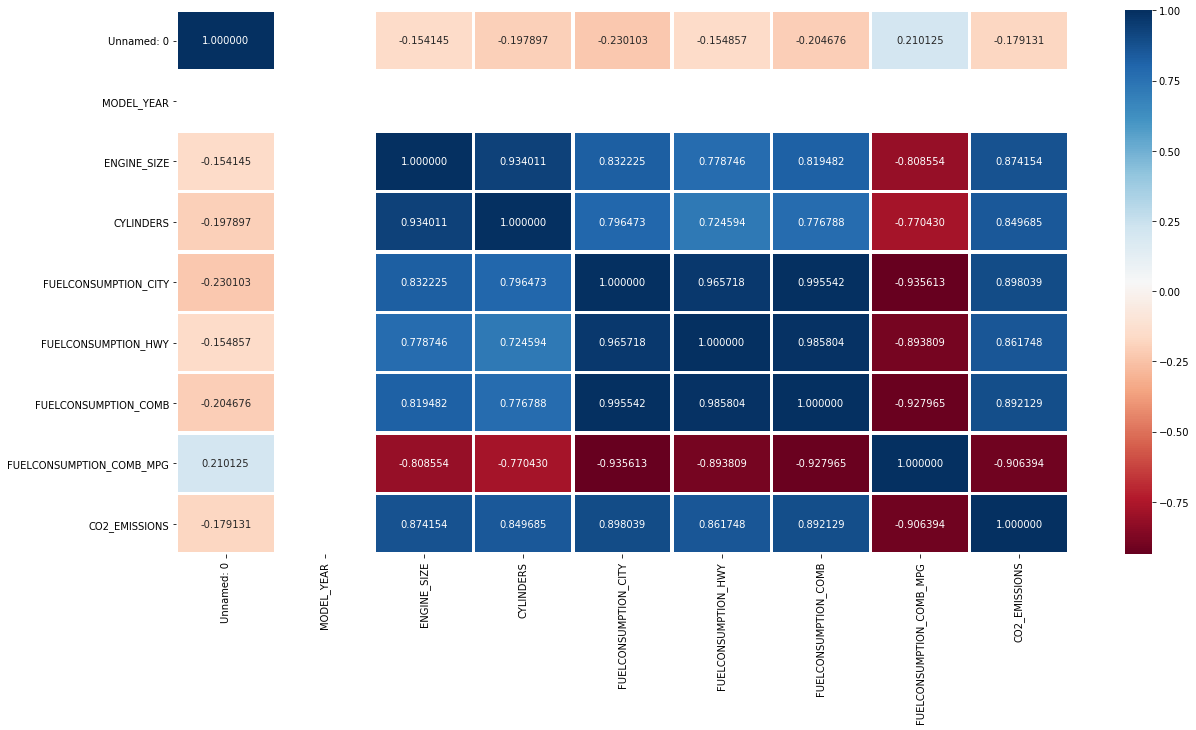

In [8]:
# # Plotting the heatmap along with the correlation matrix
# heat_map = sns.heatmap(corr_matrix, annot=True, fmt="f", linewidths=3.5)
plt.figure(figsize=(20, 10))
heat_map = sns.heatmap(corr_matrix, annot = True, fmt="f", linewidths = 2.5, xticklabels = corr_matrix.columns, yticklabels = corr_matrix.columns, cmap = "RdBu")
display(heat_map)

Looking at the heatmap along with the correlation matrix we can identify a few highly correlated variables. For example, if you look at the correlation between **`FUELCONSUMPTION_COMB`** and `**FUELCONSUMPTION_CITY**` it ends up at almost .99. This is an extremely high correlation and marks it as a candidate to be removed.

However, we should be more systematic in our approach to removing highly correlated variables. One method we can use is the `variance_inflation_factor` which **is a measure of how much a particular variable is contributing to the standard error in the regression model. When significant multicollinearity exists, the variance inflation factor will be huge for the variables in the calculation.**

A general recommendation is that if any of our variables come back with a value of 5 or higher, then they should be removed from the model. I decided to show you how the VFI comes out before we drop the highly correlated variables and after we remove the highly correlated variables. Going forward in the tutorial we will only be using the `df_after` data frame.

,ENGINE_SIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,CO2_EMISSIONS
1062,3.0,6,13.4,11.8,271
1063,3.2,6,13.2,11.5,264
1064,3.0,6,13.4,11.8,271
1065,3.2,6,12.9,11.3,260
1066,3.2,6,14.9,12.8,294


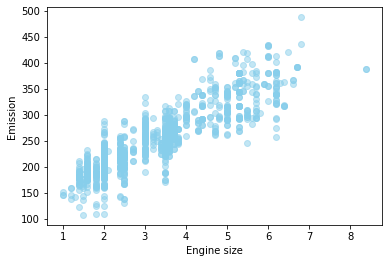

In [9]:
# Defining a new DataFrame by eliminating correlated variables
cdf = df[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','CO2_EMISSIONS']]
display(cdf.tail())

plt.scatter(cdf.ENGINE_SIZE, cdf.CO2_EMISSIONS,  color='skyblue', alpha = 0.5)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


### Exploring the Data

In [10]:
# Getting the summary of our data
desc_df = df.describe()

# Removing the Noise Column
desc_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
display(desc_df.columns)

# Adding the two rows to see datas that are 3 times the std below/above the mean
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std']*3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std']*3)

# # Adding those rows to the desc_df DataFrame
# decs_df = desc_df.append(desc_df['+3_std'], ignore_index = True)
# decs_df = desc_df.append(desc_df['-3_std'], ignore_index = True)

# Displaying the resulting DataSet
display(desc_df)

Index(['MODEL_YEAR', 'ENGINE_SIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2_EMISSIONS'],
      dtype='object')

,MODEL_YEAR,ENGINE_SIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2_EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000
+3_std,2014.0,7.593983,11.187093,25.600292,17.858133,22.037666,48.847531,446.345592
-3_std,2014.0,-0.901387,0.402410,0.992772,1.091070,1.124096,4.035319,66.111765


In [11]:
# ## Filtering the Outliers
# # As long as it's smaller than 3, we keep it, otherwise we remove it
# # Zscore method computes how many std are belo or above the mean function
# remove_df = df[(np.abs(stats.zscore(df)) < 3).all(axis = 1)]

# # How many values are removed
# print(df.shape[0] - remove_df.shape[0])

# # What rows were removed from the DataFrame
# df.index.difference(remove_df.index)

### Building the ML Model

In [16]:
# Creating our X & Y sets
df.columns
X = df[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB']]
Y = df[['CO2_EMISSIONS']]

display(X.head(), Y.head())

# Creating our Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

,ENGINE_SIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB
0,2.0,4,9.9,8.5
1,2.4,4,11.2,9.6
2,1.5,4,6.0,5.9
3,3.5,6,12.7,11.1
4,3.5,6,12.1,10.6


,CO2_EMISSIONS
0,196
1,221
2,136
3,255
4,244


In [18]:
# Creating an instance of our model
reg = LinearRegression()

# Fitting the data
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
### Exploring the output of the model

# Grabbing the intercept and the coefficent array
intercept = reg.intercept_
coef = reg.coef_

# Printting out metrics for all explanatory variables
print("The intercept for our model is {:.4}".format(intercept[0]))
print("*"*100)

# looping through thedictionnary and printting data
for cf in zip(X.columns, coef[0]):
    print("The coefficient for {} is : {:.2}".format(cf[0], cf[1]))
    

The intercept for our model is 66.78
****************************************************************************************************
The coefficient for ENGINE_SIZE is : 1.2e+01
The coefficient for CYLINDERS is : 6.4
The coefficient for FUELCONSUMPTION_CITY is : 3.5
The coefficient for FUELCONSUMPTION_COMB is : 5.8


In [20]:
# Predicting values
y_predict = reg.predict(X_test)
display(type(y_predict), y_predict.shape, y_predict[:9])


numpy.ndarray

(214, 1)

array([[256.75704489],
       [194.15911028],
       [198.59613505],
       [184.26732751],
       [307.12244785],
       [222.50781325],
       [187.29786071],
       [193.81661652],
       [235.67228099]])

### Evaluating Statisticly the Model


**Using the Statsmodel**

To make diagnosing the model easier, we will, from this point forward, be using the statsmodel module. This module has built-in functions that will make calculating metrics quick. However, we will need "rebuild" our model using the statsmodel module. We do this by creating a constant variable, call the `OLS()` method and then the `fit()` method. We now have a new model, and the first thing we need to do is to make sure that the assumptions of our model hold. This means checking the following:

- Regression residuals must be normally distributed.
- The residuals are homoscedastic
- Absence of multicollinearity (we did this above).
- No Autocorrelation.

In [21]:
# Defining our input
X1 = sm.add_constant(X)

# Create a OLS model
model = sm.OLS(Y, X1)

# Fit the data
est = model.fit()

### Checking for Heteroscedasticity

**Definition:** 
One of the assumptions of our model is that there is no heteroscedasticity. What exactly does this mean? Well, to give a simple definition it **merely means the standard errors of a variable**, monitored over a specific amount of time, are non-constant. Let's imagine a situation where heteroscedasticity could exist.

Imagine we modeled household consumption based on income, something we would probably notice is how the variability of expenditures changes depending on how much income you have. In simple terms, we would see that households with more income spend money on a broader set of items compared to lower income households that would only be able to focus on the main staples. This results in standard errors that change over income levels.

---
**What is the problem with heteroscedasticity?**

There are two big reasons why you want homoscedasticity:

1.While heteroscedasticity does not cause bias in the coefficient estimates, it causes the coefficient estimates to be less precise. The Lower precision increases the likelihood that the coefficient estimates are further from the correct population value.

2.Heteroscedasticity tends to produce p-values that are smaller than they should be. This effect occurs because heteroscedasticity increases the variance of the coefficient estimates, but the OLS procedure does not detect this increase. Consequently, OLS calculates the t-values and F-values using an underestimated amount of variance. This problem can lead you to conclude that a model term is statistically significant when it is not significant.

---

**How to test for heteroscedasticity?**

To check for heteroscedasticity, we can leverage the statsmodels.stats.diagnostic module. This module will give us to a few test functions we can run, the Breusch-Pagan and the White test for heteroscedasticity. The Breusch-Pagan is a more general test for heteroscedasticity while the White test is a unique case.

- *The Null hypothesis* for both the White’s test and the Breusch-Pagan test is that the variances for the errors are equal:
H0 = σ2i = σ2
- *The Alternate hypothesis* (the one you’re testing), is that the variances are not equal:
H1 = σ2i ≠ σ2
Our goal is to fail to reject the null hypothesis, have a high p-value because that means we have no heteroscedasticity.


In [23]:
from statsmodels.stats import diagnostic as diag

# Run the White's test
_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")
    
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity. \n")

# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")

1.644891818548622e-98 4.7083601240083754e-135
----------------------------------------------------------------------------------------------------
For the White's Test
The p-value was 1.645e-98
We reject the null hypthoesis, so there is heterosecdasticity. 

9.907903287063652e-81 1.2736418903097473e-99
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 9.908e-81
We reject the null hypthoesis, so there is heterosecdasticity.



### Checking for Autocorrelation

**What is autocorrelation?**

Autocorrelation is a characteristic of data in which the correlation between the values of the same variables is based on related objects. It violates the assumption of instance independence, which underlies most of conventional models.

When you have a series of numbers, and there is a pattern such that values in the series can be predicted based on preceding values in the series, the set of numbers is said to exhibit autocorrelation. This is also known as serial correlation and serial dependence. It generally exists in those types of data-sets in which the data, instead of being randomly selected, are from the same source.

---

**What is the problem with autocorrelation?**

The existence of autocorrelation means that computed standard errors, and consequently p-values, are misleading. Autocorrelation in the residuals of a model is also a sign that the model may be unsound. A workaround is we can compute more robust standard errors.

---

**How to test for autocorrelation?**

Again, we will go to our favorite module the `statsmodels.stats.diagnostic` module, and use the Ljung-Box test for no autocorrelation of residuals. Here:

- H0: The data are random.
- H1: The data are not random.

That means we want to fail to reject the null hypothesis, have a large p-value because then it means we have no autocorrelation. To use the **Ljung-Box** test, we will call the `acorr_ljungbox` function, pass through the `est.resid` and then define the lags.

The lags can either be calculated by the function itself, or we can calculate them. If the function handles it the max lag will be `min((num_obs // 2 - 2), 40)`, however, there is a rule of thumb that for non-seasonal time series the lag is `min(10, (num_obs // 5))`.

We also can visually check for autocorrelation by using the `statsmodels.graphics` module to plot a graph of the autocorrelation factor.

The number of lags will be 10
----------------------------------------------------------------------------------------------------
The lowest p-value found was 7.251e-51
We reject the null hypthoesis, so there is autocorrelation.
----------------------------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


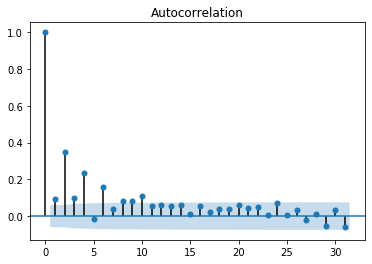

In [24]:
# test for autocorrelation
from statsmodels.stats.stattools import durbin_watson

# calculate the lag, optional
lag = min(10, (len(X)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# run the Ljung-Box test for no autocorrelation of residuals
# test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

### Checking for Narmally Distributed Residuals

This one is easy to check for; we will do it visually. This will require using a QQ pplot which help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential. It’s just a visual check, not an air-tight proof, so it is somewhat subjective.

Visually what we are looking for is the data hugs the line tightly; this would give us confidence in our assumption that the residuals are normally distributed. Now, it is highly unlikely that the data will perfectly hug the line, so this is where we have to be subjective.

---

#### Checking the Mean of the Residuals Equals 0

Additionally, we need to check another assumption, that the mean of the residuals is equal to zero. If the mean is very close to zero, then we are good to proceed. Just a side note, it's not uncommon to get a mean that isn't exactly zero; this is because of rounding errors. However, if it's very close to zero, it's ok. In the example below, you will see that it doesn't come out exactly to zero.


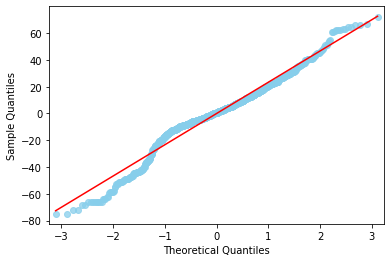

The mean of the residuals is 1.899e-14


In [27]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s', color = 'skyblue', alpha = 0.75)
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))


#### Measures of Error

We can examine how well our data fit the model, so we will take y_predictions and compare them to our y_actuals these will be our residuals. From here we can calculate a few metrics to help quantify how well our model fits the data. Here are a few popular metrics:

- **Mean Absolute Error (MAE):** Is the mean of the absolute value of the errors. This gives an idea of magnitude but no sense of direction (too high or too low).

- **Mean Squared Error (MSE):** Is the mean of the squared errors. MSE is more popular than MAE because MSE "punishes" more significant errors.

- **Root Mean Squared Error (RMSE):** Is the square root of the mean of the squared errors. RMSE is even more favored because it allows us to interpret the output in y-units.

Luckily for us, sklearn and statsmodel both contain functions that will calculate these metrics for us. The examples below were calculated using the sklearn library and the math library.

In [28]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("Mean Squared Error {:.3}".format(model_mse))
print("Mean Absolute Error {:.3}".format(model_mae))
print("Root of Mean Squared Error {:.3}".format(model_rmse))

Mean Squared Error 5.52e+02
Mean Absolute Error 16.7
Root of Mean Squared Error 23.5



#### R-Squared

The R-Squared metric provides us a way to measure the goodness of fit or, in other words, how well our data fits the model. The higher the R-Squared metric, the better the data fit our model. However, one limitation is that R-Square increases as the number of features increase in our model, so if I keep adding variables even if they're poor choices R-Squared will still go up! A more popular metric is the adjusted R-Square which penalizes more complex models, or in other words models with more exploratory variables. In the example below, I calculate the regular R-Squared value, however, the `statsmodel` summary will calculate the Adjusted R-Squared below.

In [29]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.86


#### Confidence Intervals

Let's look at our confidence intervals. Keep in mind that by default confidence intervals are calculated using 95% intervals. We interpret confidence intervals by saying if the population from which this sample was drawn was sampled 100 times. Approximately 95 of those confidence intervals would contain the "true" coefficient.

Why do we provide a confidence range? Well, it comes from the fact that we only have a sample of the population, not the entire population itself. Because of this, it means that the "true" coefficient could exist in the interval below or it couldn't, but we cannot say for sure. We provide some uncertainty by providing a range, usually 95%, where the coefficient is probably in.

- Want a narrower range? Decrease your confidence.
- Want a wider range? Increase your confidence.

In [30]:
# make some confidence intervals, 95% by default
est.conf_int()

,0,1
const,59.620919,72.644448
ENGINE_SIZE,7.846142,13.970420
CYLINDERS,4.947248,9.489781
FUELCONSUMPTION_CITY,-1.950513,5.951005
FUELCONSUMPTION_COMB,2.871172,11.837174


#### Hypothesis Testing

With hypothesis testing, we are trying to determine the statistical significance of the coefficient estimates. This test is outlined as the following.

- **Null Hypothesis:** There is no relationship between the exploratory variables and the explanatory variable.
- **Alternative Hypothesis:** There is a relationship between the exploratory variables and the explanatory variable.

---

- If we reject the null, we are saying there is a relationship, and the coefficients do not equal 0.
- If we fail to reject the null, we are saying there is no relationship, and the coefficients do equal 0

In [31]:
# estimate the p-values
est.pvalues

const                   2.570945e-75
ENGINE_SIZE             4.850432e-12
CYLINDERS               6.458870e-10
FUELCONSUMPTION_CITY    3.207167e-01
FUELCONSUMPTION_COMB    1.325776e-03
dtype: float64

Here it's a little hard to tell, but we have a few insignificant coefficients. The first is the constant itself, so technically this should be dropped. However, we will see that once we remove the irrelevant variables that the intercept becomes significant. If it still wasn't significant, we could have our intercept start at 0 and assume that the cumulative effect of X on Y begins from the origin (0,0). Along with the constant, we have unemployment and broad_money_growth both come out as insignificant.

#### Create a Summary of the Model Output

Let's create a summary of some of our keep metrics, sklearn does not have a good way of creating this output so we would have to calculate all the parameters ourselves. Let's avoid this and use the statsmodel.api library as we can create the same model we did up above, but we can also leverage the summary() method to create an output for us. Some of the metrics might differ slightly, but they generally should be the same.

In [32]:
# print out a summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_EMISSIONS   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1688.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:29:38   Log-Likelihood:                -4875.6
No. Observations:                1067   AIC:                             9761.
Df Residuals:                    1062   BIC:                             9786.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   66.1327 

### Remove Insignificant variables 

In [35]:

# define our input variable (X) & output variable
# df_after = df.drop(['birth_rate', 'final_consum_growth','gross_capital_formation','broad_money_growth',
#                               'unemployment'], axis = 1)

df.columns
X = df[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB']]
Y = df[['CO2_EMISSIONS']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
reg = LinearRegression()

# pass through the X_train & y_train data set
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_EMISSIONS   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1688.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:33:59   Log-Likelihood:                -4875.6
No. Observations:                1067   AIC:                             9761.
Df Residuals:                    1062   BIC:                             9786.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   66.1327 